# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Import Libraries

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm
import pandas as pd
from google.colab import drive
from matplotlib.gridspec import GridSpec
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [ ]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
train_labels = []
test_labels=[]
trainFaces=[]
testFaces=[]

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("/content/drive/My Drive/ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)
        if(j==1 and len(test_labels)<40):
            testFaces.append(img)
            test_labels.append(i)
        else:
            train_labels.append(i)
            trainFaces.append(img)


trainFaces=np.array(trainFaces)
testFaces=np.array(testFaces)

randomOrder = np.random.permutation(len(train_labels))
trainFaces = np.array(trainFaces)[randomOrder]
labels = np.array(train_labels)[randomOrder]

randomOrder = np.random.permutation(len(test_labels))
testFaces = np.array(testFaces)[randomOrder]
test_labels = np.array(test_labels)[randomOrder]


flattened_images_train = trainFaces.reshape(trainFaces.shape[0], -1)

flattened_images_test= testFaces.reshape(testFaces.shape[0], -1)
print(flattened_images_train.shape)



(360, 10304)


<ipython-input-5-9e49ad10949c>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


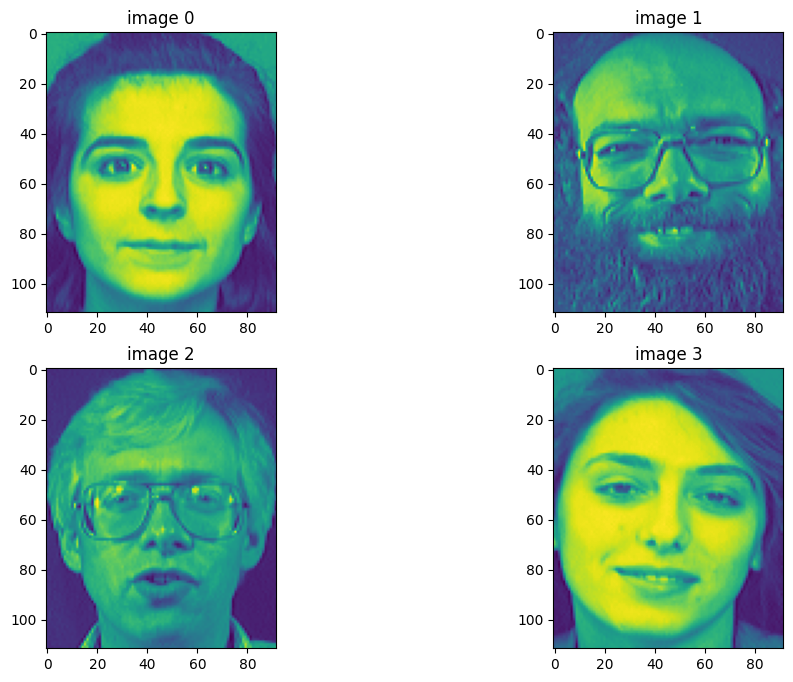

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.title('image {}'.format(i-1))
    plt.imshow(flattened_images_train[i-1].reshape(112,92))

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [ ]:
# flattened_images_test=flattened_images_test
# flattened_images_train=flattened_images_train
# print(flattened_images_train.shape)
# print(flattened_images_train.shape)

In [ ]:
def standarize(X):
    mu=np.mean(X,axis=0)
    X=X-mu
    xbar=(X-mu)

    return xbar,mu

def eig(X):
    print("fasdg")
    print(X.shape)
    eig_val, eig_vec = np.linalg.eigh(X)

    # sorting them in decrasing order
    sorted_eig  = np.argsort(-eig_val)
    eig_val = eig_val[sorted_eig]
    eig_vec = eig_vec[:, sorted_eig]

    return (eig_val, eig_vec)
# function for projection matrix

def projection_matrix(B):
    # calculate the projection matrix P
    P = B @ B.T
    return P

def mse(predict, actual):
    return np.square(predict - actual).sum(axis = 1).mean()

def PCA(X):
    # alculate the data covariance matrix S
    S = np.cov(X.T)
    # now find eigenvalues and corresponding eigenvectors for S by implementing eig().
    eig_vals, eig_vecs = eig(S)
    return eig_vals,eig_vecs

In [ ]:
### converting to 1d array
Xbar_train, mu_train =  standarize(flattened_images_train)

eig_values,eig_vectors=PCA(Xbar_train)





fasdg
(10304, 10304)


In [ ]:
print(eig_vectors.shape)
print(eig_values.shape)

(10304, 10304)
(10304,)


In [ ]:
# plot the eigen faces
%matplotlib inline


Text(0.5, 1.0, 'original image')

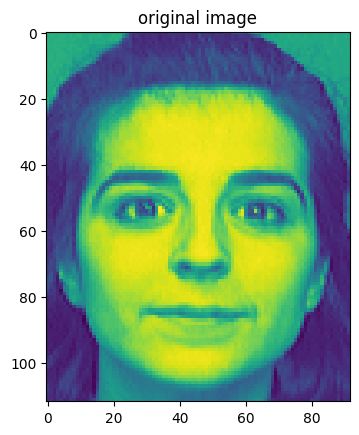

In [ ]:
plt.imshow(flattened_images_train[0].reshape(112,92))
plt.title("original image")

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [ ]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    return ( testFace@eigenFaces@eigenFaces.T+meanFace)


Text(0.5, 1.0, 'reconstructed image')

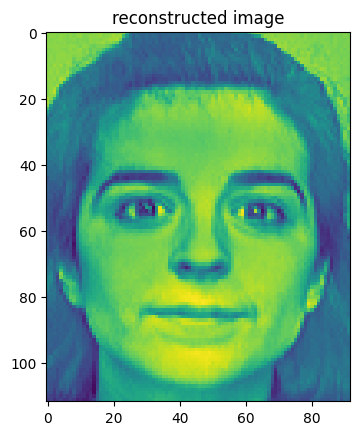

In [ ]:
# plot recontructions here
%matplotlib inline
recons_image=imageReconstruction(Xbar_train[0],eig_vectors,mu_train)
plt.imshow(recons_image.reshape(112,92))
plt.title("reconstructed image")



#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

<ipython-input-14-2a6e3b60004e>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i)


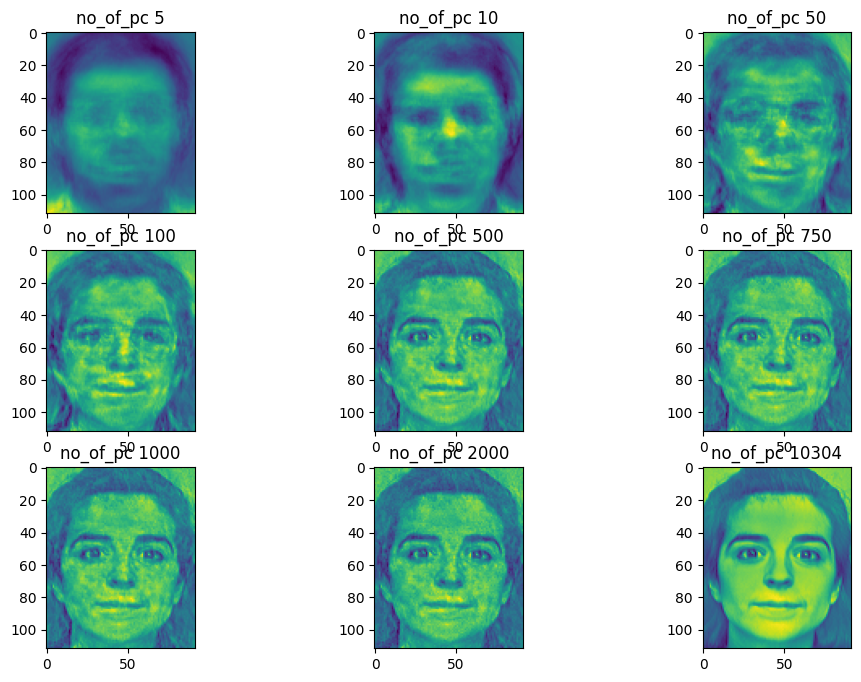

In [ ]:
%matplotlib inline

def displayNfactors():

    # your code here

    return None
pc=[5,10,50,100,500,750,1000,2000,len(eig_values)]
fig, ax = plt.subplots(figsize = (12, 8))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.title('no_of_pc {}'.format(pc[i-1]))
    eigen_faces=eig_vectors[:,:pc[i-1]]
    recons_image=imageReconstruction(Xbar_train[0],eigen_faces,mu_train)
    plt.imshow(recons_image.reshape(112,92))


#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:


def getClass(test_image, eigenvectors, mean_eigen_face, X_train, y_train):
    """
    Arguments:
    1. Test image
    2. Eigenvectors
    3. Mean Eigen Face
    4. Training Set(X_train,y_train)

    The function must return the following:
    1. image with smallest error
    2. error value
    3. prediction class
    """
    # Project test image onto PCA subspace
    # test_image_flattened = test_image.flatten()

    test_image=test_image-eigen_faces
    projected_test_image = np.dot(test_image ,eigenvectors)

    # Compute reconstruction error for each training image
    errors = []
    for i in range(len(X_train)):

        projected_train_image = np.dot(X_train[i], eigenvectors)
        ## calculating the euqlidean distance
        error = np.mean(np.linalg.norm(projected_test_image - projected_train_image))
        errors.append(error)

    # Find image with smallest error
    min_error_index = np.argmin(errors)
    min_error_image = X_train[min_error_index]
    min_error_value = errors[min_error_index]
    prediction_class = y_train[min_error_index]

    return min_error_image, min_error_value, prediction_class


In [57]:
pred_image,error,pred_class=getClass(flattened_images_test[0],eig_vectors[:,:5],mu_train,Xbar_train,train_labels)
print(pred_class)

28


Iterate through all the images in the test data and test the accuracy by taking different number of components

In [ ]:
components = [3,5,10,20,30,40,50]
mse_error = []
pred_labels=[]
i=0
for image in flattened_images_test:
    errors=[]
    labels=[]
    for numComponents in components:
        vector=eig_vectors[:,:numComponents]
        _,error,pc_class=getClass(image,vector,mu_train,Xbar_train,train_labels)
        errors.append(error)
        labels.append(pc_class)

    mse_error.append(errors)
    pred_labels.append(labels)
    print(i)
    i+=1










# #your code here



# #your code here

In [58]:
# for x, y in zip(pred_labels, test_labels):
#     print("original label:", y, "predicted label:", x)


In [59]:




mse_error=np.array(mse_error)

print(mse_error[0])

#your code here

[1943433.57932026 2036997.17012027 2118337.89412058 2158218.27774575
 2184819.17864778 2189215.5250285  2200460.52660926]


Plot Number of eigenvectors vs Mean Square Error

Processing...
1 91144818.21190467
51 7031882.950756995
101 4713944.874013319
151 3681589.411198824
201 2955813.2443604595
251 2504473.474559611
301 2189383.1225378076
351 1968616.8778416563
401 1921941.0321983462
451 1911456.7453420914
501 1903931.3924145827
551 1893861.577294981
601 1887719.6429563782
651 1879170.3224105458
701 1871899.112241898
751 1863442.7124677983
801 1854993.2811079943
851 1844946.6341423935
901 1837745.733932586
951 1830354.838923329
Done!


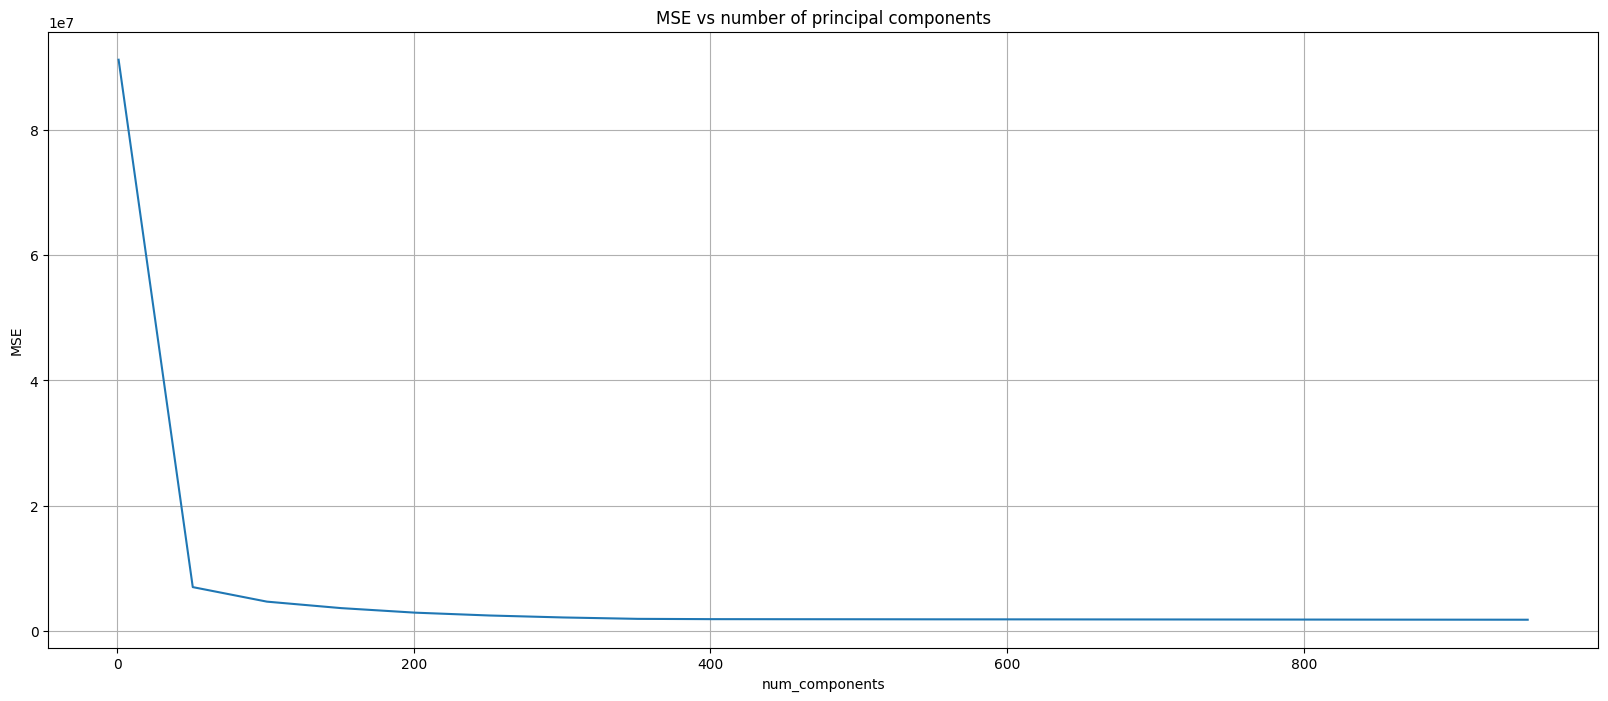

In [60]:
# your code here
# calculating loss and reconstructing image

loss = []

print("Processing...")

for num_component in range(1, 1000,50):

    U = eig_vectors[:, range(num_component)]
    projection =projection_matrix(U) # projection matrix

    reconst = (Xbar_train @ projection)

    error = mse(reconst, Xbar_train)

    loss.append((num_component, error))
    print(num_component, error)

print("Done!")

fig, ax = plt.subplots(figsize = (20, 8))
x_values = [point[0] for point in loss]
y_values = [point[1] for point in loss]
ax.plot(x_values, y_values)
ax.set(xlabel = 'num_components', ylabel = 'MSE', title = 'MSE vs number of principal components')
plt.grid()


Plot Number of eigenvectors vs Logarithmic Mean Square Error

Processing...
1 17.990867976189076
51 8.167144508065778
101 7.194104923144966
151 6.694923997867596
201 6.21292835513012
251 5.882050965469446
301 5.617317451440819
351 5.403673032351298
401 5.359161413470887
451 5.351734832825794
501 5.345777253805731
551 5.324107521199444
601 5.312271909532033
651 5.302639272748121
701 5.296032048319049
751 5.286054100479512
801 5.278538161092656
851 5.263482857516059
901 5.256066831586251
951 5.256748389886573
Done!


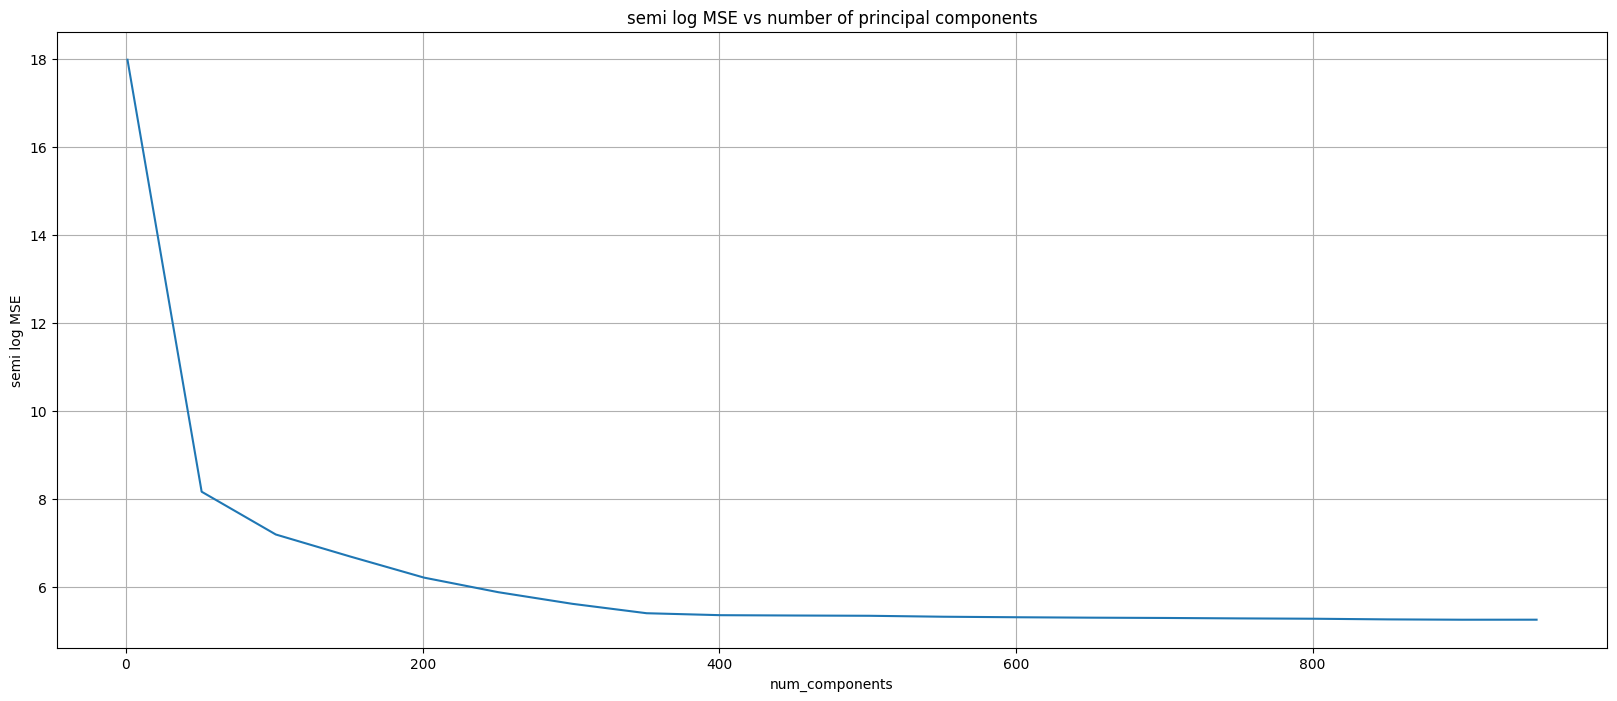

In [65]:
# your code here
# calculating loss and reconstructing image

loss = []

print("Processing...")

for num_component in range(1, 1000,50):

    U = eig_vectors[:, range(num_component)]
    projection =projection_matrix(U) # projection matrix

    reconst = (Xbar_train @ projection)

    error = np.mean(np.log(np.abs(reconst - Xbar_train) + 1)**2)

    loss.append((num_component, error))
    print(num_component, error)

print("Done!")

fig, ax = plt.subplots(figsize = (20, 8))
x_values = [point[0] for point in loss]
y_values = [point[1] for point in loss]
ax.plot(x_values, y_values)
ax.set(xlabel = 'num_components', ylabel = 'semi log MSE', title = 'semi log MSE vs number of principal components')
plt.grid()
